In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [62]:
PATH = "DL# Beginner/"
sz=224

In [63]:
torch.cuda.is_available()

True

In [64]:
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

In [65]:
torch.backends.cudnn.enabled

True

In [66]:
os.listdir(PATH)

['models',
 'sample_submission.csv',
 'test',
 'test.csv',
 'test_result.csv',
 'tmp',
 'train',
 'train.csv',
 'train1.csv']

TRAINING SET

In [67]:
arch=resnet34
data = ImageClassifierData.from_csv(PATH,folder=os.listdir(PATH)[6],csv_fname="DL# Beginner/train.csv",test_name=os.listdir(PATH)[2], tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.544453   0.300405   0.911154  
    1      0.343039   0.24594    0.925                                                                                 



[array([0.24594]), 0.9249999996332022]

In [10]:
data.val_y

array([11, 19, 12, ..., 13,  9, 20], dtype=int64)

In [68]:
log_preds = learn.predict()
print(log_preds.shape)

(2600, 30)


In [69]:
log_preds[:10]

array([[-15.35353,  -9.87944, -10.11022, -12.86213, -12.11517, -12.22509,  -9.00427, -14.76685, -11.47212,
        -12.27036, -12.72501,  -0.00113, -13.81823, -11.71892,  -8.64906, -15.17698, -10.93778, -11.77642,
        -12.13028, -11.8068 , -12.05856, -10.37029,  -8.89075,  -8.89824, -10.29161, -11.6891 , -13.31825,
         -8.12467, -12.90965, -13.70547],
       [-16.28401, -14.23363, -16.54716,  -9.34383, -16.09412, -13.65542, -15.30143, -11.84504, -14.44283,
        -17.2735 , -19.93615, -16.04629, -17.42648, -14.763  , -15.46224, -17.29738, -13.75733, -13.97041,
        -15.72981,  -0.00018, -15.12115, -14.82364, -18.1103 , -16.41256,  -9.50243, -15.8469 , -15.17321,
        -15.574  , -14.34181, -15.76786],
       [-10.19108, -12.97158, -15.83539, -14.71213, -15.94394, -15.0268 , -16.75661, -15.18392, -13.91491,
        -13.87928, -16.50238, -15.39005,  -0.00032, -12.27385, -18.22885, -12.1277 , -16.73002, -16.61533,
         -8.28512, -16.18195, -18.13568, -16.34373, -11.6260

In [70]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,:])    

In [71]:
probs[:10]

array([[0.     , 0.00005, 0.00004, 0.     , 0.00001, 0.     , 0.00012, 0.     , 0.00001, 0.     , 0.     ,
        0.99888, 0.     , 0.00001, 0.00018, 0.     , 0.00002, 0.00001, 0.00001, 0.00001, 0.00001, 0.00003,
        0.00014, 0.00014, 0.00003, 0.00001, 0.     , 0.0003 , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.00009, 0.     , 0.     , 0.     , 0.00001, 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.99982, 0.     , 0.     ,
        0.     , 0.     , 0.00007, 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.00004, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.99968, 0.     , 0.     , 0.00001, 0.     , 0.     , 0.00025, 0.     , 0.     , 0.     ,
        0.00001, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.00005, 0.00003, 0.00013, 0.00011, 0.97349, 0.00004, 0.00014, 0.0001 , 0.00003, 0.00002, 0.00933,
        

In [15]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [16]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [17]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [18]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


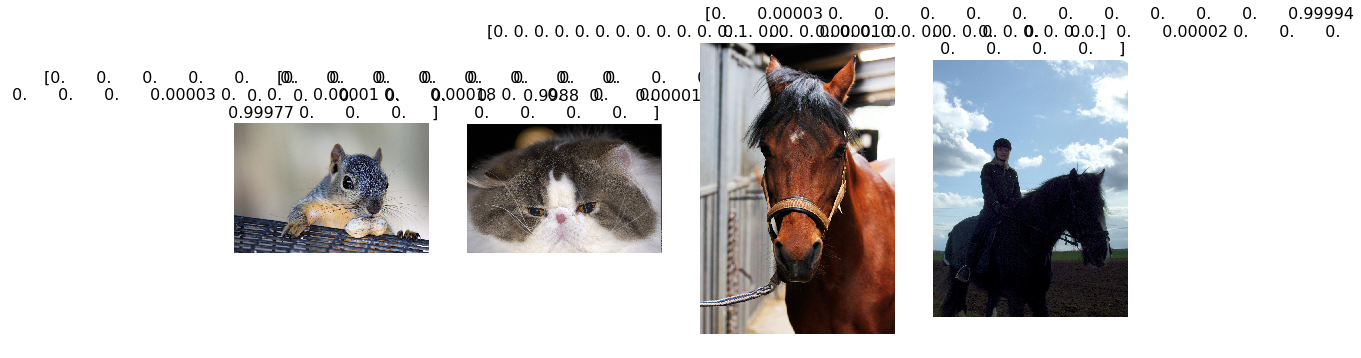

In [19]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [100]:
log_pred_test = learn.predict(is_test=True)

In [101]:
log_pred_test.shape

(6000, 30)

In [102]:
preds_test = np.argmax(log_pred_test, axis=1)  # from log probabilities to 0 or 1
probs_test = np.exp(log_pred_test[:,:]) 

In [103]:
probs_test[:10]

array([[0.     , 0.     , 0.     , 0.     , 0.99999, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.00001, 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 1.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 1.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 1.     , 0.     , 0.     ,
        

In [104]:
np.savetxt('test_result.csv',probs_test, fmt='%f', delimiter=',',header=' ')

In [73]:
lrf=learn.lr_find()

 76%|███████████████████████████████████████████████████▋                | 124/163 [00:02<00:00, 54.20it/s, loss=0.717]


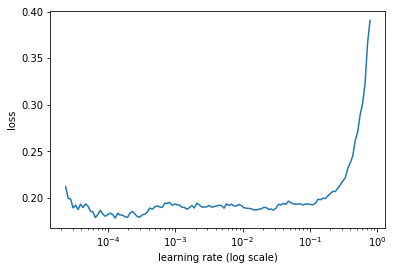

In [74]:
learn.sched.plot()

DATA AUGMENTATION

In [20]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [23]:
def get_augs():
    data = ImageClassifierData.from_csv(PATH,folder=os.listdir(PATH)[6],csv_fname="DL# Beginner/train.csv",test_name=os.listdir(PATH)[2], bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [24]:
ims = np.stack([get_augs() for i in range(6)])

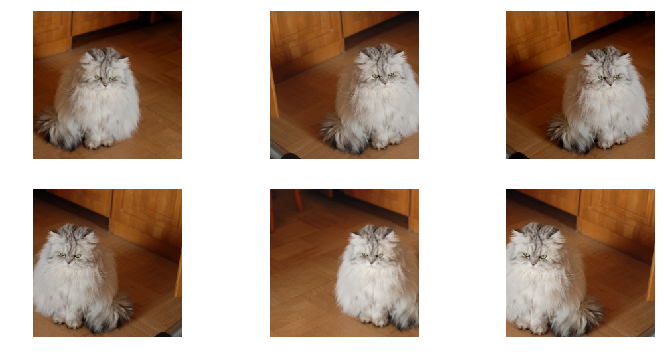

In [25]:
plots(ims, rows=2)

In [26]:
data = ImageClassifierData.from_csv(PATH,folder=os.listdir(PATH)[6],csv_fname="DL# Beginner/train.csv",test_name=os.listdir(PATH)[2], tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [27]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.553799   0.30585    0.911923  



[array([0.30585]), 0.911923076923077]

In [28]:
learn.precompute=False

In [29]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.415159   0.271385   0.92      
    1      0.36546    0.255103   0.920769                                                                              
    2      0.33803    0.246173   0.925                                                                                 



[array([0.24617]), 0.925]